# Implementation of Multilayer Perceptron from Scratch

Now that we learned how multilayer perceptrons (MLPs) work in theory, let's implement them. First, import the required packages or modules.

In [1]:
import sys
sys.path.insert(0, '..')

%matplotlib inline
import d2l
from mxnet import nd
from mxnet.gluon import loss as gloss

We continue to use the Fashion-MNIST data set. We will use the Multilayer Perceptron for image classification

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## Initialize Model Parameters

We know that the dataset contains 10 classes and that the images are of $28 \times 28 = 784$ pixel resolution. Thus the number of inputs is 784 and the number of outputs is 10. Moreover, we use an MLP with one hidden layer and we set the number of hidden units to 256, but we could have picked some other value for this *hyperparameter*, too. Typically one uses powers of 2 since things align more nicely in memory.

In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

## Activation Function

Here, we use the underlying `maximum` function to implement the ReLU, instead of invoking `ReLU` directly.

In [4]:
def relu(X):
    return nd.maximum(X, 0)

## The model

As in softmax regression, using `reshape` we change each original image to a length vector of  `num_inputs`. We then implement implement the MLP just as discussed previously.

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(nd.dot(X, W1) + b1)
    return nd.dot(H, W2) + b2

## The Loss Function

For better numerical stability, we use Gluon's functions, including softmax calculation and cross-entropy loss calculation. We discussed the intricacies of that in the [previous section](mlp.md). This is simply to avoid lots of fairly detailed and specific code (the interested reader is welcome to look at the source code for more details, something that is useful for implementing other related functions).

In [6]:
loss = gloss.SoftmaxCrossEntropyLoss()

## Training

Steps for training the Multilayer Perceptron are no different from Softmax Regression training steps.  In the `d2l` package, we directly call the `train_ch3` function, whose implementation was introduced [here](softmax-regression-scratch.md). We set the number of epochs to 10 and the learning rate to 0.5.

In [7]:
num_epochs, lr = 10, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params, lr)

epoch 1, loss 0.7954, train acc 0.703, test acc 0.791


epoch 2, loss 0.4895, train acc 0.818, test acc 0.835


epoch 3, loss 0.4313, train acc 0.840, test acc 0.857


epoch 4, loss 0.3934, train acc 0.855, test acc 0.865


epoch 5, loss 0.3754, train acc 0.862, test acc 0.872


epoch 6, loss 0.3591, train acc 0.867, test acc 0.873


epoch 7, loss 0.3388, train acc 0.876, test acc 0.863


epoch 8, loss 0.3301, train acc 0.878, test acc 0.873


epoch 9, loss 0.3185, train acc 0.884, test acc 0.879


epoch 10, loss 0.3092, train acc 0.885, test acc 0.886


To see how well we did, let's apply the model to some test data. If you're interested, compare the result to corresponding [linear model](softmax-regression-scratch.md).

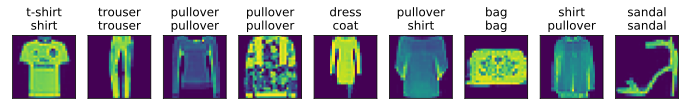

In [8]:
for X, y in test_iter:
    break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [truelabel + '\n' + predlabel
          for truelabel, predlabel in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])

This looks slightly better than before, a clear sign that we're on to something good here.

## Summary

We saw that implementing a simple MLP is quite easy, when done manually. That said, for a large number of layers this can get quite complicated (e.g. naming the model parameters, etc).

## Exercises

1. Change the value of the hyper-parameter `num_hiddens` in order to see the result effects.
1. Try adding a new hidden layer to see how it affects the results.
1. How does changing the learning rate change the result.
1. What is the best result you can get by optimizing over all the parameters (learning rate, iterations, number of hidden layers, number of hidden units per layer)?

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2339)

![](../img/qr_mlp-scratch.svg)